# 06 Clean Merged Data

In [35]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import warnings
warnings.filterwarnings('ignore')

In [36]:
df: pd.DataFrame = pd.read_csv('../data/interim/datasets_combined/all_teams_combined.csv')

In [37]:
print(df.shape)
df.head()

(624, 121)


,Player,Season,Nationality,Pos,Position,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,xA,A-xAG,KP,1/3,PPA,CrsPA,Live,Dead,TB,Sw,Crs,TI,CK,In,Out,Str,Off,Blocks,SCA,SCA90,PassLive,PassDead,TO,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def_3rd,Mid_3rd,Att_3rd,Tkl.1,Tkl%,Lost,Pass,Int,Tkl+Int,Clr,Err,Touches,Def_Pen,Att_Pen,Succ,Succ%,Tkld,Tkld%,Carries,CPA,Mis,Dis,Rec,MarketValueEuro,Current club
0,Abdellah Raihani,2324,Morocco,FW,Centre-Forward,19,1,0,10.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0,1.0,0.0,1.0,300000.0,Atlético Madrid
1,Adrian Niño,2324,Spain,FW,Centre-Forward,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,Atlético Madrid
2,Aitor Gismera,2324,Spain,MF,Central Midfield,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,Atlético Madrid
3,Antoine Griezmann,2324,France,"FW,MF",Centre-Forward,32,33,31,2644.0,29.4,16.0,6.0,22.0,12.0,4.0,4.0,5.0,0.0,12.3,9.3,5.6,14.9,43.0,118.0,196.0,0.54,0.2,0.75,0.41,0.61,0.42,0.19,0.61,0.32,0.51,75.0,29.0,38.7,2.55,0.99,0.16,0.41,17.3,3.0,0.12,3.7,2.7,1062.0,1383.0,76.8,16588.0,4212.0,589.0,671.0,87.8,313.0,414.0,75.6,99.0,178.0,55.6,5.8,0.4,43.0,86.0,34.0,2.0,1212.0,161.0,13.0,14.0,123.0,4.0,94.0,28.0,42.0,0.0,10.0,32.0,107.0,3.64,68.0,21.0,4.0,2.0,2.0,11.0,0.37,10.0,0.0,0.0,1.0,0.0,0.0,33.0,19.0,14.0,14.0,5.0,15.0,36.6,26.0,31.0,10.0,43.0,23.0,1.0,1654.0,35.0,113.0,22.0,57.9,15.0,39.5,839.0,7.0,40.0,26.0,1194.0,25000000.0,Atlético Madrid
4,Antonio Gomis,2324,Spain,GK,Goalkeeper,20,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.0,Atlético Madrid


---

## 1. Position data

Position data is messy:
- POS column has multiple values separated by commas
    * Could split into separate columns or create boolean flags
- Position column has "Centre-Forward" vs "Center Forward" spelling differences
    * Should group into Attack/Midfield/Defense/Goalkeeper categories

In [38]:
# Create Boolean Position Flags (for ML models)
def create_position_flags(df: pd.DataFrame) -> pd.DataFrame:
    """Create boolean flags for each position."""
    all_positions = ['FW', 'MF', 'DF', 'GK']
    for pos in all_positions:
        df[f'Pos_{pos}'] = df['Pos'].str.contains(pos, na=False).astype(int)
    return df

# Extract Primary Position (for simple analysis)
def get_primary_position(pos_string: str) -> str:
    """Extract the first position listed."""
    if pd.isna(pos_string):
        return 'Unknown'
    return pos_string.split(',')[0].strip()

In [39]:
# Apply all approaches
df = create_position_flags(df)
df['Primary_Pos'] = df['Pos'].apply(get_primary_position)

In [40]:
df.head()

,Player,Season,Nationality,Pos,Position,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,xA,A-xAG,KP,1/3,PPA,CrsPA,Live,Dead,TB,Sw,Crs,TI,CK,In,Out,Str,Off,Blocks,SCA,SCA90,PassLive,PassDead,TO,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def_3rd,Mid_3rd,Att_3rd,Tkl.1,Tkl%,Lost,Pass,Int,Tkl+Int,Clr,Err,Touches,Def_Pen,Att_Pen,Succ,Succ%,Tkld,Tkld%,Carries,CPA,Mis,Dis,Rec,MarketValueEuro,Current club,Pos_FW,Pos_MF,Pos_DF,Pos_GK,Primary_Pos
0,Abdellah Raihani,2324,Morocco,FW,Centre-Forward,19,1,0,10.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0,1.0,0.0,1.0,300000.0,Atlético Madrid,1,0,0,0,FW
1,Adrian Niño,2324,Spain,FW,Centre-Forward,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,Atlético Madrid,1,0,0,0,FW
2,Aitor Gismera,2324,Spain,MF,Central Midfield,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,Atlético Madrid,0,1,0,0,MF
3,Antoine Griezmann,2324,France,"FW,MF",Centre-Forward,32,33,31,2644.0,29.4,16.0,6.0,22.0,12.0,4.0,4.0,5.0,0.0,12.3,9.3,5.6,14.9,43.0,118.0,196.0,0.54,0.2,0.75,0.41,0.61,0.42,0.19,0.61,0.32,0.51,75.0,29.0,38.7,2.55,0.99,0.16,0.41,17.3,3.0,0.12,3.7,2.7,1062.0,1383.0,76.8,16588.0,4212.0,589.0,671.0,87.8,313.0,414.0,75.6,99.0,178.0,55.6,5.8,0.4,43.0,86.0,34.0,2.0,1212.0,161.0,13.0,14.0,123.0,4.0,94.0,28.0,42.0,0.0,10.0,32.0,107.0,3.64,68.0,21.0,4.0,2.0,2.0,11.0,0.37,10.0,0.0,0.0,1.0,0.0,0.0,33.0,19.0,14.0,14.0,5.0,15.0,36.6,26.0,31.0,10.0,43.0,23.0,1.0,1654.0,35.0,113.0,22.0,57.9,15.0,39.5,839.0,7.0,40.0,26.0,1194.0,25000000.0,Atlético Madrid,1,1,0,0,FW
4,Antonio Gomis,2324,Spain,GK,Goalkeeper,20,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.0,Atlético Madrid,0,0,0,1,GK


Note: For ML models, consider dropping the original 'Pos' column since we now have:
- Boolean flags (Pos_FW, Pos_MF, Pos_DF, Pos_GK) - better for ML (represents all positions they can play with an arbitrary priority system)
- Primary_Pos - categorical but less granular
- Pos_Category - mapping by position (represents player's actual playing position)

The boolean flags are most suitable for ML as they avoid multicollinearity issues

In [41]:
# Create position category from Position column (more accurate)
position_category_mapping = {
    'Centre-Forward': 'Attack',
    'Second Striker': 'Attack',
    'Right Winger': 'Attack',
    'Left Winger': 'Attack',
    'Attacking Midfield': 'Attack',
    'Central Midfield': 'Midfield',
    'Defensive Midfield': 'Midfield',
    'Right Midfield': 'Midfield',
    'Left Midfield': 'Midfield',
    'Centre-Back': 'Defense',
    'Right-Back': 'Defense',
    'Left-Back': 'Defense',
    'Goalkeeper': 'Goalkeeper'
}
df['Pos_Category'] = df['Position'].map(position_category_mapping)
print(df['Pos_Category'].value_counts())

Pos_Category
Attack        214
Defense       206
Midfield      135
Goalkeeper     69
Name: count, dtype: int64


## 2. Nationality data

Nationality field needs work:
- FIFA codes are not ideal for ML (arbitrary, high cardinality)
- Better approach would be to use geographic coordinates (latitude, longitude)
- This captures meaningful distances between countries and cultures

In [42]:
# Geographic coordinates mapping for nationalities
nationality_coordinates = {
    'Spain': (40.0, -4.0),
    'Portugal': (39.0, -8.0),
    'France': (46.0, 2.0),
    'Belgium': (50.8, 4.0),
    'Netherlands': (52.1, 5.3),
    'Germany': (51.0, 10.0),
    'Austria': (47.3, 13.3),
    'Switzerland': (47.0, 8.0),
    'Italy': (42.8, 12.8),
    'Greece': (39.0, 22.0),
    'Croatia': (45.1, 15.2),
    'Slovenia': (46.0, 15.0),
    'Serbia': (44.0, 21.0),
    'Bosnia-Herzegovina': (44.0, 18.0),
    'North Macedonia': (41.6, 21.7),
    'Montenegro': (42.0, 19.0),
    'Romania': (46.0, 25.0),
    'Ukraine': (49.0, 32.0),
    'Poland': (52.0, 19.0),
    'Brazil': (-15.0, -47.0),
    'Argentina': (-34.6, -58.4),
    'Uruguay': (-34.9, -56.2),
    'Colombia': (4.7, -74.1),
    'Chile': (-33.4, -70.6),
    'Ecuador': (-0.2, -78.5),
    'Morocco': (34.0, -6.0),
    'Algeria': (36.8, 3.0),
    'Senegal': (14.7, -17.4),
    'Nigeria': (9.1, 7.4),
    'Ghana': (5.6, -0.2),
    'Guinea': (9.5, -13.7),
    'Gabon': (0.4, 9.5),
    'DR Congo': (-4.3, 15.3),
    'Cote d\'Ivoire': (5.3, -4.0),
    'Cape Verde': (14.9, -23.5),
    'Mozambique': (-25.9, 32.6),
    'United States': (38.9, -77.0),
    'Mexico': (19.4, -99.1),
    'Dominican Republic': (18.5, -69.9),
    'Guadeloupe': (16.3, -61.6),
    'England': (51.5, -0.1),
    'Denmark': (55.7, 12.6),
    'Norway': (59.9, 10.7),
    'Sweden': (59.3, 18.1),
    'Japan': (35.7, 139.7),
    'Georgia': (41.7, 44.8),
    'Türkiye': (39.9, 32.9),
    'Andorra': (42.5, 1.5)
}

In [43]:
# Add geographic coordinates to dataframe
df['Nationality_Latitude'] = df['Nationality'].map(lambda x: nationality_coordinates.get(x, (0, 0))[0])
df['Nationality_Longitude'] = df['Nationality'].map(lambda x: nationality_coordinates.get(x, (0, 0))[1])

print(f"Added latitude and longitude columns")
print(f"Sample coordinates:")
sample_coords = df[['Nationality', 'Nationality_Latitude', 'Nationality_Longitude']].drop_duplicates().head(10)
for _, row in sample_coords.iterrows():
    print(f"  {row['Nationality']}: ({row['Nationality_Latitude']:.1f}, {row['Nationality_Longitude']:.1f})")

Added latitude and longitude columns
Sample coordinates:
  Morocco: (34.0, -6.0)
  Spain: (40.0, -4.0)
  France: (46.0, 2.0)
  Belgium: (50.8, 4.0)
  Brazil: (-15.0, -47.0)
  Romania: (46.0, 25.0)
  Greece: (39.0, 22.0)
  Croatia: (45.1, 15.2)
  Slovenia: (46.0, 15.0)
  Uruguay: (-34.9, -56.2)


In [44]:
# Add distance features from major centers
major_centers = {
    'Europe': (48.0, 10.0),  # Central Europe
    'South_America': (-23.5, -46.6),  # São Paulo
    'Africa': (0.0, 20.0),  # Central Africa
    'North_America': (40.7, -74.0),  # New York
}

for center_name, (center_lat, center_lon) in major_centers.items():
    # Calculate rough distance (simplified)
    lat_diff = df['Nationality_Latitude'] - center_lat
    lon_diff = df['Nationality_Longitude'] - center_lon
    distance = (lat_diff**2 + lon_diff**2)**0.5
    df[f'Distance_from_{center_name}'] = distance

print(f"Added distance features from major footballing centers:")
distance_columns = [col for col in df.columns if col.startswith('Distance_from_')]
for col in distance_columns:
    print(f"  {col}")

Added distance features from major footballing centers:
  Distance_from_Europe
  Distance_from_South_America
  Distance_from_Africa
  Distance_from_North_America


In [45]:
# Show sample distances
print("Sample distances from major centers:")
sample_distances = df[['Nationality'] + distance_columns].drop_duplicates().head(5)
for _, row in sample_distances.iterrows():
    print(f"\n{row['Nationality']}:")
    for col in distance_columns:
        print(f"  {col}: {row[col]:.1f}")

# Remove FIFA codes column if it exists
if 'Nationality_FIFA' in df.columns:
    df = df.drop('Nationality_FIFA', axis=1)
    print("\nRemoved Nationality_FIFA column (not suitable for ML)")

print(f"\nFinal nationality features:")
nationality_features = [col for col in df.columns if 'Nationality' in col]
for feature in nationality_features:
    print(f"  {feature}")

print(f"\nTotal nationality features: {len(nationality_features)}")
print(f"Original cardinality: {df['Nationality'].nunique()} countries")
print(f"New cardinality: {len(nationality_features)} numeric features")

Sample distances from major centers:

Morocco:
  Distance_from_Europe: 21.3
  Distance_from_South_America: 70.4
  Distance_from_Africa: 42.8
  Distance_from_North_America: 68.3

Spain:
  Distance_from_Europe: 16.1
  Distance_from_South_America: 76.5
  Distance_from_Africa: 46.6
  Distance_from_North_America: 70.0

France:
  Distance_from_Europe: 8.2
  Distance_from_South_America: 84.8
  Distance_from_Africa: 49.4
  Distance_from_North_America: 76.2

Belgium:
  Distance_from_Europe: 6.6
  Distance_from_South_America: 89.9
  Distance_from_Africa: 53.3
  Distance_from_North_America: 78.7

Brazil:
  Distance_from_Europe: 85.0
  Distance_from_South_America: 8.5
  Distance_from_Africa: 68.7
  Distance_from_North_America: 61.9

Final nationality features:
  Nationality
  Nationality_Latitude
  Nationality_Longitude

Total nationality features: 3
Original cardinality: 48 countries
New cardinality: 3 numeric features


In [46]:
print(df.shape)
df.head()

(624, 133)


,Player,Season,Nationality,Pos,Position,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,xA,A-xAG,KP,1/3,PPA,CrsPA,Live,Dead,TB,Sw,Crs,TI,CK,In,Out,Str,Off,Blocks,SCA,SCA90,PassLive,PassDead,TO,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def_3rd,Mid_3rd,Att_3rd,Tkl.1,Tkl%,Lost,Pass,Int,Tkl+Int,Clr,Err,Touches,Def_Pen,Att_Pen,Succ,Succ%,Tkld,Tkld%,Carries,CPA,Mis,Dis,Rec,MarketValueEuro,Current club,Pos_FW,Pos_MF,Pos_DF,Pos_GK,Primary_Pos,Pos_Category,Nationality_Latitude,Nationality_Longitude,Distance_from_Europe,Distance_from_South_America,Distance_from_Africa,Distance_from_North_America
0,Abdellah Raihani,2324,Morocco,FW,Centre-Forward,19,1,0,10.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0,1.0,0.0,1.0,300000.0,Atlético Madrid,1,0,0,0,FW,Attack,34.0,-6.0,21.260292,70.388991,42.801869,68.329276
1,Adrian Niño,2324,Spain,FW,Centre-Forward,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,Atlético Madrid,1,0,0,0,FW,Attack,40.0,-4.0,16.124515,76.465744,46.647615,70.003500
2,Aitor Gismera,2324,Spain,MF,Central Midfield,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,Atlético Madrid,0,1,0,0,MF,Midfield,40.0,-4.0,16.124515,76.465744,46.647615,70.003500
3,Antoine Griezmann,2324,France,"FW,MF",Centre-Forward,32,33,31,2644.0,29.4,16.0,6.0,22.0,12.0,4.0,4.0,5.0,0.0,12.3,9.3,5.6,14.9,43.0,118.0,196.0,0.54,0.2,0.75,0.41,0.61,0.42,0.19,0.61,0.32,0.51,75.0,29.0,38.7,2.55,0.99,0.16,0.41,17.3,3.0,0.12,3.7,2.7,1062.0,1383.0,76.8,16588.0,4212.0,589.0,671.0,87.8,313.0,414.0,75.6,99.0,178.0,55.6,5.8,0.4,43.0,86.0,34.0,2.0,1212.0,161.0,13.0,14.0,123.0,4.0,94.0,28.0,42.0,0.0,10.0,32.0,107.0,3.64,68.0,21.0,4.0,2.0,2.0,11.0,0.37,10.0,0.0,0.0,1.0,0.0,0.0,33.0,19.0,14.0,14.0,5.0,15.0,36.6,26.0,31.0,10.0,43.0,23.0,1.0,1654.0,35.0,113.0,22.0,57.9,15.0,39.5,839.0,7.0,40.0,26.0,1194.0,25000000.0,Atlético Madrid,1,1,0,0,FW,Attack,46.0,2.0,8.246211,84.806898,49.396356,76.184578
4,Antonio Gomis,2324,Spain,GK,Goalkeeper,20,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.0,Atlético Madrid,0,0,0,1,GK,Goalkeeper,40.0,-4.0,16.124515,76.465744,46.647615,70.003500


NOTE: How to use these new features in ML models

**ML Feature Usage Notes**

**1. Position:**
* Boolean flags (Pos_FW, Pos_MF, Pos_DF, Pos_GK): Use all 4 for ML
* Primary_Pos: Drop (redundant with boolean flags)
* Pos_Category: Drop (redundant with boolean flags)
* Original 'Pos': Drop (high cardinality, messy)

**2. Nationality:**
* Nationality_Latitude, Nationality_Longitude: Use both
* Distance_from_*: Use all 4 distance features
* Original 'Nationality': Drop (high cardinality)

**3. Feature Selection for ML:**
* Keep: Pos_FW, Pos_MF, Pos_DF, Pos_GK (4 features)
* Keep: Nationality_Latitude, Nationality_Longitude (2 features)
* Keep: Distance_from_Europe, Distance_from_South_America, Distance_from_Africa, Distance_from_North_America (4 features)
* Total new features: 10 (vs 48+ original categorical features)

**4. Benefits:**
* Lower cardinality: 10 features vs 48+ categories
* Numeric features: Better for most ML algorithms
* Meaningful relationships: Geographic distances capture footballing culture similarities
* No multicollinearity: Boolean flags are independent

**5. DROP THESE COLUMNS BEFORE ML:**
* ['Pos', 'Primary_Pos', 'Pos_Category', 'Nationality']

### Only keep relevant columns for ML

- TOP 10 CORELLATED FEATURES TO MARKETVALUE (see notebook _05)

- Starts             0.712750
- 90s                0.685461
- Min                0.685270
- MP                 0.615856
- Cmp.3              0.607253
- PrgDist            0.596705
- Att.3              0.591311
- Carries            0.586538
- TotDist            0.580317
- Att                0.570538

###################################### 

- Features selection additional:
- Pos_FW, Pos_MF, Pos_DF, Pos_GK, Nationality_Latitude, Nationality_Longitude, Distance_from_Europe, Distance_from_South_America, Distance_from_Africa, Distance_from_North_America

###################################### \

- Total 20 features

## 3. Current Club

**Approach Ideas**

**Problems with Current Club column:**
- High cardinality: Many unique clubs
- Missing values: Some players have no club listed  
- Prestige differences: Real Madrid vs small clubs have very different market value impacts
- Categorical: Not ideal for ML algorithms

**Maybe better approaches for ML:**

**1. Club Prestige/Tier System (probably the best approach here)**
- Define club tiers based on prestige, league level, etc.
- Example: Elite (Real Madrid, Barcelona), Top (Sevilla, Valencia), Mid (Girona, Las Palmas), Lower (Cádiz, Granada)
- Creates 4-5 boolean flags instead of many categorical values
- Captures prestige differences that affect market value

**2. League Level Encoding**
- Map clubs to their league level (La Liga, Segunda, etc.)
- Lower cardinality than individual clubs
- Captures competition level differences

**3. Market Value Correlation**
- Group clubs by average player market value
- Create tiers: High-value clubs, Medium-value clubs, Low-value clubs
- Data-driven approach based on actual market values

**4. Geographic Club Features**
- Add club location coordinates (similar to nationality approach)
- Calculate distances from major footballing centers
- Captures regional differences in player development

**Recommended approach: Club Prestige Tiers**
- Creates 5 boolean features (Elite, Top, Mid, Lower, Unknown)
- Handles missing values (Unknown tier)
- Captures prestige differences that affect market value
- Low cardinality for better ML performance

In [47]:
df['Current club'].unique()

array(['Atlético Madrid', 'Valencia CF', 'Sevilla FC', 'Villarreal CF',
       'Real Madrid CF', 'Real Betis', 'FC Barcelona', 'Athletic Club',
       'Real Sociedad'], dtype=object)

In [48]:
# Step 1: Map clubs to tiers
club_tier_mapping = {
    "Real Madrid CF": "Elite",
    "FC Barcelona": "Elite",
    "Atlético Madrid": "Top",
    "Real Sociedad": "Top",
    "Villarreal CF": "Top",
    "Sevilla FC": "Mid",
    "Real Betis": "Mid",
    "Athletic Club": "Mid",
    "Valencia CF": "Mid"
}

# Step 2: Apply mapping and handle unknowns
df['Club_Tier'] = df['Current club'].map(club_tier_mapping).fillna("Unknown")

# Step 3: One-hot encode as boolean flags
club_dummies = pd.get_dummies(df['Club_Tier'], prefix='Club')
df = pd.concat([df, club_dummies], axis=1)


In [49]:
# Ensure all Club_* columns are integers
club_cols = ['Club_Elite', 'Club_Top', 'Club_Mid']
df[club_cols] = df[club_cols].astype(int)

In [50]:
df.head()

,Player,Season,Nationality,Pos,Position,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,xA,A-xAG,KP,1/3,PPA,CrsPA,Live,Dead,TB,Sw,Crs,TI,CK,In,Out,Str,Off,Blocks,SCA,SCA90,PassLive,PassDead,TO,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def_3rd,Mid_3rd,Att_3rd,Tkl.1,Tkl%,Lost,Pass,Int,Tkl+Int,Clr,Err,Touches,Def_Pen,Att_Pen,Succ,Succ%,Tkld,Tkld%,Carries,CPA,Mis,Dis,Rec,MarketValueEuro,Current club,Pos_FW,Pos_MF,Pos_DF,Pos_GK,Primary_Pos,Pos_Category,Nationality_Latitude,Nationality_Longitude,Distance_from_Europe,Distance_from_South_America,Distance_from_Africa,Distance_from_North_America,Club_Tier,Club_Elite,Club_Mid,Club_Top
0,Abdellah Raihani,2324,Morocco,FW,Centre-Forward,19,1,0,10.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0,1.0,0.0,1.0,300000.0,Atlético Madrid,1,0,0,0,FW,Attack,34.0,-6.0,21.260292,70.388991,42.801869,68.329276,Top,0,0,1
1,Adrian Niño,2324,Spain,FW,Centre-Forward,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,Atlético Madrid,1,0,0,0,FW,Attack,40.0,-4.0,16.124515,76.465744,46.647615,70.003500,Top,0,0,1
2,Aitor Gismera,2324,Spain,MF,Central Midfield,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,Atlético Madrid,0,1,0,0,MF,Midfield,40.0,-4.0,16.124515,76.465744,46.647615,70.003500,Top,0,0,1
3,Antoine Griezmann,2324,France,"FW,MF",Centre-Forward,32,33,31,2644.0,29.4,16.0,6.0,22.0,12.0,4.0,4.0,5.0,0.0,12.3,9.3,5.6,14.9,43.0,118.0,196.0,0.54,0.2,0.75,0.41,0.61,0.42,0.19,0.61,0.32,0.51,75.0,29.0,38.7,2.55,0.99,0.16,0.41,17.3,3.0,0.12,3.7,2.7,1062.0,1383.0,76.8,16588.0,4212.0,589.0,671.0,87.8,313.0,414.0,75.6,99.0,178.0,55.6,5.8,0.4,43.0,86.0,34.0,2.0,1212.0,161.0,13.0,14.0,123.0,4.0,94.0,28.0,42.0,0.0,10.0,32.0,107.0,3.64,68.0,21.0,4.0,2.0,2.0,11.0,0.37,10.0,0.0,0.0,1.0,0.0,0.0,33.0,19.0,14.0,14.0,5.0,15.0,36.6,26.0,31.0,10.0,43.0,23.0,1.0,1654.0,35.0,113.0,22.0,57.9,15.0,39.5,839.0,7.0,40.0,26.0,1194.0,25000000.0,Atlético Madrid,1,1,0,0,FW,Attack,46.0,2.0,8.246211,84.806898,49.396356,76.184578,Top,0,0,1
4,Antonio Gomis,2324,Spain,GK,Goalkeeper,20,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.0,Atlético Madrid,0,0,0,1,GK,Goal

In [51]:
df['Club_Tier'].value_counts()

Club_Tier
Mid      350
Elite    151
Top      123
Name: count, dtype: int64

In [52]:
########  mean / target encoding for club tiers

from sklearn.model_selection import KFold

# Create empty column
df['Club_Tier_TE'] = 0.0

# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Apply mean encoding using CV
for train_idx, val_idx in kf.split(df):
    train, val = df.iloc[train_idx], df.iloc[val_idx]
    means = train.groupby('Club_Tier')['MarketValueEuro'].mean()
    df.loc[val_idx, 'Club_Tier_TE'] = val['Club_Tier'].map(means)

# Check if any NaNs due to missing mapping
df['Club_Tier_TE'].fillna(df['MarketValueEuro'].mean(), inplace=True)


- We used target encoding for Club_Tier because it turns a categorical column (Elite, Top, Mid) into a meaningful numeric feature that reflects the average market value of each tier. Instead of assigning arbitrary numbers or one-hot encoding, we assign the average market value seen for players in each tier — but done in a cross-validated way to avoid overfitting or data leakage.

Benefits:

- Captures real impact of club tier on player value

- Reduces dimensionality (just 1 numeric column)

- Improves model learning by providing a value with actual meaning

- Avoids overfitting by computing means from separate folds

In [53]:
df.head(2)

,Player,Season,Nationality,Pos,Position,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,xA,A-xAG,KP,1/3,PPA,CrsPA,Live,Dead,TB,Sw,Crs,TI,CK,In,Out,Str,Off,Blocks,SCA,SCA90,PassLive,PassDead,TO,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def_3rd,Mid_3rd,Att_3rd,Tkl.1,Tkl%,Lost,Pass,Int,Tkl+Int,Clr,Err,Touches,Def_Pen,Att_Pen,Succ,Succ%,Tkld,Tkld%,Carries,CPA,Mis,Dis,Rec,MarketValueEuro,Current club,Pos_FW,Pos_MF,Pos_DF,Pos_GK,Primary_Pos,Pos_Category,Nationality_Latitude,Nationality_Longitude,Distance_from_Europe,Distance_from_South_America,Distance_from_Africa,Distance_from_North_America,Club_Tier,Club_Elite,Club_Mid,Club_Top,Club_Tier_TE
0,Abdellah Raihani,2324,Morocco,FW,Centre-Forward,19,1,0,10.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0,1.0,0.0,1.0,300000.0,Atlético Madrid,1,0,0,0,FW,Attack,34.0,-6.0,21.260292,70.388991,42.801869,68.329276,Top,0,0,1,1.147629e+07
1,Adrian Niño,2324,Spain,FW,Centre-Forward,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,Atlético Madrid,1,0,0,0,FW,Attack,40.0,-4.0,16.124515,76.465744,46.647615,70.003500,Top,0,0,1,1.145918e+07


In [54]:
df['Club_Tier_TE'].value_counts()

Club_Tier_TE
7.615985e+06    81
6.941545e+06    75
6.984806e+06    67
6.806316e+06    65
7.850260e+06    62
3.305482e+07    37
3.223814e+07    33
3.105924e+07    32
1.162663e+07    31
3.475451e+07    29
1.147629e+07    26
1.145918e+07    25
1.177626e+07    24
3.318893e+07    20
1.073302e+07    17
Name: count, dtype: int64

---

## Train-Test Split

In [55]:
from typing import Any
import numpy as np
from sklearn.model_selection import KFold

In [56]:
df.head()

,Player,Season,Nationality,Pos,Position,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,xA,A-xAG,KP,1/3,PPA,CrsPA,Live,Dead,TB,Sw,Crs,TI,CK,In,Out,Str,Off,Blocks,SCA,SCA90,PassLive,PassDead,TO,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def_3rd,Mid_3rd,Att_3rd,Tkl.1,Tkl%,Lost,Pass,Int,Tkl+Int,Clr,Err,Touches,Def_Pen,Att_Pen,Succ,Succ%,Tkld,Tkld%,Carries,CPA,Mis,Dis,Rec,MarketValueEuro,Current club,Pos_FW,Pos_MF,Pos_DF,Pos_GK,Primary_Pos,Pos_Category,Nationality_Latitude,Nationality_Longitude,Distance_from_Europe,Distance_from_South_America,Distance_from_Africa,Distance_from_North_America,Club_Tier,Club_Elite,Club_Mid,Club_Top,Club_Tier_TE
0,Abdellah Raihani,2324,Morocco,FW,Centre-Forward,19,1,0,10.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,1.0,0.0,1.0,0.0,1.0,300000.0,Atlético Madrid,1,0,0,0,FW,Attack,34.0,-6.0,21.260292,70.388991,42.801869,68.329276,Top,0,0,1,1.147629e+07
1,Adrian Niño,2324,Spain,FW,Centre-Forward,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,Atlético Madrid,1,0,0,0,FW,Attack,40.0,-4.0,16.124515,76.465744,46.647615,70.003500,Top,0,0,1,1.145918e+07
2,Aitor Gismera,2324,Spain,MF,Central Midfield,19,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,Atlético Madrid,0,1,0,0,MF,Midfield,40.0,-4.0,16.124515,76.465744,46.647615,70.003500,Top,0,0,1,1.162663e+07
3,Antoine Griezmann,2324,France,"FW,MF",Centre-Forward,32,33,31,2644.0,29.4,16.0,6.0,22.0,12.0,4.0,4.0,5.0,0.0,12.3,9.3,5.6,14.9,43.0,118.0,196.0,0.54,0.2,0.75,0.41,0.61,0.42,0.19,0.61,0.32,0.51,75.0,29.0,38.7,2.55,0.99,0.16,0.41,17.3,3.0,0.12,3.7,2.7,1062.0,1383.0,76.8,16588.0,4212.0,589.0,671.0,87.8,313.0,414.0,75.6,99.0,178.0,55.6,5.8,0.4,43.0,86.0,34.0,2.0,1212.0,161.0,13.0,14.0,123.0,4.0,94.0,28.0,42.0,0.0,10.0,32.0,107.0,3.64,68.0,21.0,4.0,2.0,2.0,11.0,0.37,10.0,0.0,0.0,1.0,0.0,0.0,33.0,19.0,14.0,14.0,5.0,15.0,36.6,26.0,31.0,10.0,43.0,23.0,1.0,1654.0,35.0,113.0,22.0,57.9,15.0,39.5,839.0,7.0,40.0,26.0,1194.0,25000000.0,Atlético Madrid,1,1,0,0,FW,Attack,46.0,2.0,8.246211,84.806898,49.396356,76.184578,Top,0,0,1,1.177626e+07
4,Antonio Gomis,2324,Spain,GK,Goalkeeper,20,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [57]:
def create_next_season_market_value_column(df: 'pd.DataFrame') -> 'pd.DataFrame':
    """Assigns next season's market value as target for each player-season row."""
    df_sorted: 'pd.DataFrame' = df.sort_values(['Season', 'Player'])
    df_sorted['MarketValue_NextSeason'] = np.nan

    # Map from season to next season
    season_order: list[int] = sorted(df_sorted['Season'].unique())
    season_to_next: dict[int, int] = {season_order[i]: season_order[i+1] for i in range(len(season_order)-1)}

    # For each player, assign next season's market value
    for player_name, player_df in df_sorted.groupby('Player'):
        player_df_sorted: 'pd.DataFrame' = player_df.sort_values('Season')
        for idx, row in player_df_sorted.iterrows():
            current_season: int = row['Season']
            if current_season in season_to_next:
                next_season: int = season_to_next[current_season]
                next_season_row: 'pd.Series' = player_df_sorted[player_df_sorted['Season'] == next_season]
                if not next_season_row.empty:
                    next_market_value: float = next_season_row.iloc[0]['MarketValueEuro']
                    df_sorted.at[idx, 'MarketValue_NextSeason'] = next_market_value
    return df_sorted


In [58]:
# Create next season market value column
df_with_market_values = create_next_season_market_value_column(df)

In [59]:
# Rename MarketValueEuro to Current_MarketValueEuro
df_with_market_values = df_with_market_values.rename(columns={'MarketValueEuro': 'Current_MarketValueEuro'})

In [60]:
# Drop all rows with season 2425 (last season)
df_with_market_values = df_with_market_values[df_with_market_values['Season'] != 2425]

In [61]:
# Drop rows with missing target (MarketValue_NextSeason)
df_clean: 'pd.DataFrame' = df_with_market_values.dropna(subset=['MarketValue_NextSeason'])

In [62]:
df_clean = df_clean.drop(columns='Player')

In [63]:
# Split into features and target
X: 'pd.DataFrame' = df_clean.drop(columns=['MarketValue_NextSeason'])
y: 'pd.Series' = df_clean['MarketValue_NextSeason']

# KFold split (example: 5 folds)
kf: KFold = KFold(n_splits=5, shuffle=True, random_state=42)
# Example: get the first train/test split
for train_index, test_index in kf.split(X):
    X_train: 'pd.DataFrame' = X.iloc[train_index]
    X_test: 'pd.DataFrame' = X.iloc[test_index]
    y_train: 'pd.Series' = y.iloc[train_index]
    y_test: 'pd.Series' = y.iloc[test_index]
    break  # Remove this break if you want to use all folds

---

## Feature Engineering

In [64]:
def assign_market_value_tier(value):
    if value < 1_000_000:
        return 0  # Low
    elif value < 10_000_000:
        return 1  # Budget
    elif value < 30_000_000:
        return 2  # Standard
    elif value < 80_000_000:
        return 3  # Premium
    else:
        return 4  # Elite

In [65]:
X_train['MarketValue_Tier'] = X_train['Current_MarketValueEuro'].apply(assign_market_value_tier)
X_test['MarketValue_Tier'] = X_test['Current_MarketValueEuro'].apply(assign_market_value_tier)

In [67]:
required_feature_columns: list[str] = [
    'Season', 'Age', 'Club_Tier_TE', 'Current_MarketValueEuro', 'MarketValue_Tier',
    'Starts', '90s', 'Min', 'MP', 'Cmp.3', 'PrgDist', 'Att.3', 'Carries', 'TotDist', 'Att',
    'Pos_FW', 'Pos_MF', 'Pos_DF', 'Pos_GK',
    'Nationality_Latitude', 'Nationality_Longitude',
    'Distance_from_Europe', 'Distance_from_South_America', 'Distance_from_Africa', 'Distance_from_North_America'
]

def print_missing_columns(reference_columns: list[str], compare_columns: list[str]) -> None:
    """Print columns in reference_columns that are missing from compare_columns."""
    missing_columns: set[str] = set(reference_columns) - set(compare_columns)
    if missing_columns:
        print(f"Columns in reference but missing in compare: {missing_columns}")

print_missing_columns(required_feature_columns, X_train.columns.tolist())
print_missing_columns(required_feature_columns, X_test.columns.tolist())

X_train = X_train[required_feature_columns]
X_test = X_test[required_feature_columns]

---

## Baseline Model

In [68]:
# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [85]:
# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"RMSE: {rmse:,.2f}")
print(f"MAE:  {mae:,.2f}")
print(f"R²:   {r2:.4f}")

RMSE: 12,707,419.30
MAE:  7,764,232.56
R²:   0.6809


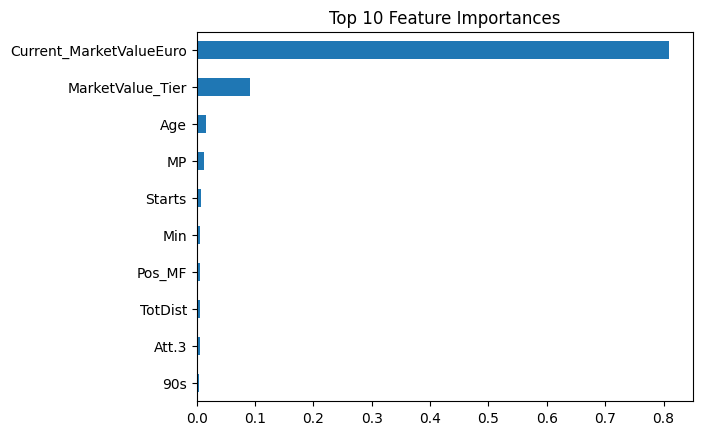

In [70]:
def plot_top_feature_importances(model: RandomForestRegressor, feature_names: list[str], top_n: int = 10) -> None:
    """Plot the top N feature importances for a trained model."""
    feature_importances: pd.Series = pd.Series(model.feature_importances_, index=feature_names)
    top_feature_importances: pd.Series = feature_importances.nlargest(top_n)
    ax = top_feature_importances.plot(kind='barh')
    ax.set_title("Top 10 Feature Importances")
    ax.invert_yaxis()
    plt.show()

plot_top_feature_importances(model, X_train.columns.tolist())

### - ✅ What the current model shows:
- MAE ≈ €7.8M: On average, your predictions are off by about €7.8 million.

- RMSE ≈ €12.7M: Penalizes larger errors more, which suggests some extreme outliers (e.g. superstar players).

- R² ≈ 0.68: The model explains 68% of the variance in player market value — solid performance for a challenging prediction task.

This result suggests that our features, especially the new tiering strategy, helped the model capture real-world market dynamics effectively.

### ⚽ Why predicting market value is hard:
Market value is influenced by:

- Stats (you covered this well)

- Age & club (also covered)

- Injuries, agents, hype, nationality bias, marketing value, transfer rumors, contract duration, etc. — many of which aren’t captured in your dataset.

## 4. Missing values